In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

## エーレンフェストの壺(Ehrenfest's pot)

- 設定
    - 壺が2つ(pot_A, pot_B)あり、Aには0～(N-1)のN個のボールが入っている

- 試行
    - 0～(N-1)のカードから無作為に1枚選ぶ
        - 出たカードがpot_Aにあればpot_Aからpot_Bに移す
        - 出たカードがpot_Bにあればpot_Bからpot_Aに移す（要は上の逆の操作）
    - 上記の試行を何度も繰り返す

上記の設定&試行で、pot_Aに入っているボールの数はどのように推移するだろうか？

ref. https://www.gakushuin.ac.jp/~881791/materials/Irreversiblity09.pdf

In [2]:
def calc_num_pot_A(N=10, M=10):
    '''
    - Input
        N: カードの数
        M: 試行の数
    - Output
        df: pot_A内に残っているボールの数の遷移列をDataFrame型にしたもの
    '''
    ## カードの設定
    cards = list(range(N))
    ## 壺A(pot_A), 壺Bの設定
    pot_A, pot_B = list(range(N)), []
    ## 遷移列の初期化
    seq_num_pot_A = []

    ## 試行をM回繰り返す
    for _ in range(M):
        ## 1枚カードを取り出す
        card = random.sample(cards,1)[0]
        #print(card, pot_A, pot_B) ## for debug

        ## カードが壺Aの中にある場合
        if card in pot_A:
            pot_A.remove(card)
            pot_B.append(card)
        ## それ以外(=カードが壺Bにある)場合
        else:
            pot_B.remove(card)
            pot_A.append(card)
        ## 試行の記録を取る
        seq_num_pot_A.append(len(pot_A))
    return pd.DataFrame(seq_num_pot_A)

def depict_transition(df, N, M):
    '''
    - Input
        df: pot_A内のボールの数の遷移
        N: カードの数
        M: 試行の数
    - Output
        描画されたグラフ
    '''
    half_N = N / 2 ## 真ん中に引く赤点線用の値を計算
    
    ## 描画
    fig = plt.figure()
    plt.plot(df)
    plt.xlim([0, M])
    plt.ylim([0, N])
    plt.axhline(y=half_N, color='red', linestyle='dashed')
    plt.xlabel('Number of trials')
    plt.ylabel('Number of balls in pot_A')
    plt.title('Transition on number of pot_A with {} balls'.format(N))
    plt.show()

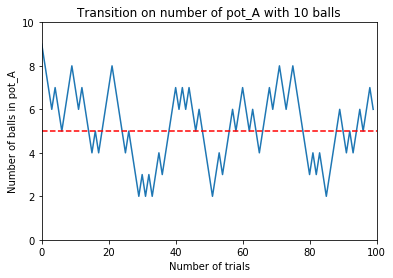

In [3]:
N, M = 10, 100

df = calc_num_pot_A(N, M)
depict_transition(df, N, M)

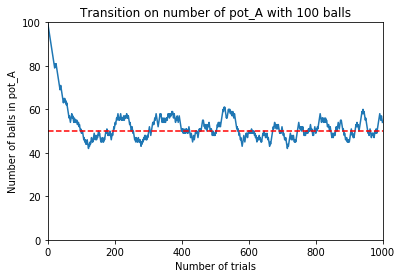

In [4]:
N, M = 100, 1000

df = calc_num_pot_A(N, M)
depict_transition(df, N, M)

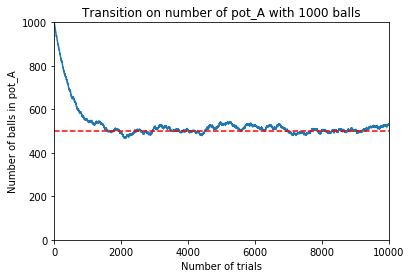

In [5]:
## 試行実施
N, M = 1000, 10000

df = calc_num_pot_A(N, M)
depict_transition(df, N, M)

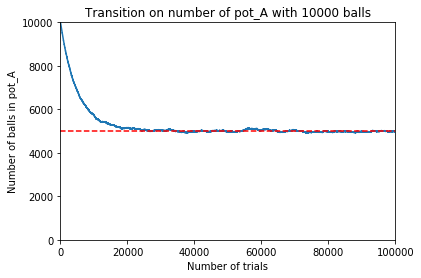

In [6]:
## 試行実施
N, M = 10000, 100000

df = calc_num_pot_A(N, M)
depict_transition(df, N, M)